# Спринт 3. Исследовательский анализ данных

## Постановка задачи:

1. Изучить, как быстро продавались квартиры
2. Определить какие факторы больше всего влияют на общую (полную) стоимость объекта?
3. Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра. 
4. Найти закономерность между стоимостью объектов зависит от расстояния до центра города.

## Шаг 1. Загружаем dataframe

##### Импортируем датасет с помощью pandas

In [1]:
import pandas as pd #Подключаем pandas
import math as mt

In [2]:
data = pd.read_csv('datasets/real_estate_data.csv', sep = '\t') #Создаем датафрейм из csv

##### Изучаем общую информацию о полученном файле**

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Описание столбцов:**  
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
balcony — число балконов  
ceiling_height — высота потолков (м)  
cityCenters_nearest — расстояние до центра города (м)  
days_exposition — сколько дней было размещено объявление (от публикации до снятия)  
first_day_exposition — дата публикации  
floor — этаж  
floors_total — всего этажей в доме  
is_apartment — апартаменты (булев тип)  
kitchen_area — площадь кухни в квадратных метрах (м²)  
last_price — цена на момент снятия с публикации  
living_area — жилая площадь в квадратных метрах (м²)  
locality_name — название населённого пункта  
open_plan — свободная планировка (булев тип)  
parks_around3000 — число парков в радиусе 3 км  
parks_nearest — расстояние до ближайшего парка (м)  
ponds_around3000 — число водоёмов в радиусе 3 км  
ponds_nearest — расстояние до ближайшего водоёма (м)  
rooms — число комнат  
studio — квартира-студия (булев тип)  
total_area — общая площадь квартиры в квадратных метрах (м²)  
total_images — число фотографий квартиры в объявлении  

##### Видимые проблемы:

Очевидно, что в столбцах ceiling_height, floors_total, is_apartment, living_area, kitchen_area, balcony, locality_name, airports_nearest,  cityCenters_nearest, parks_around3000, ponds_nearest, days_exposition есть пропущенные значения

Так же столбцы is_apartment и floors_total явно имеют неправильный тип (должен быть bool и int). Дата публикации записана в виде строки, что может быть не удобно

##### Построим общую гистограмму для всех столбцов

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

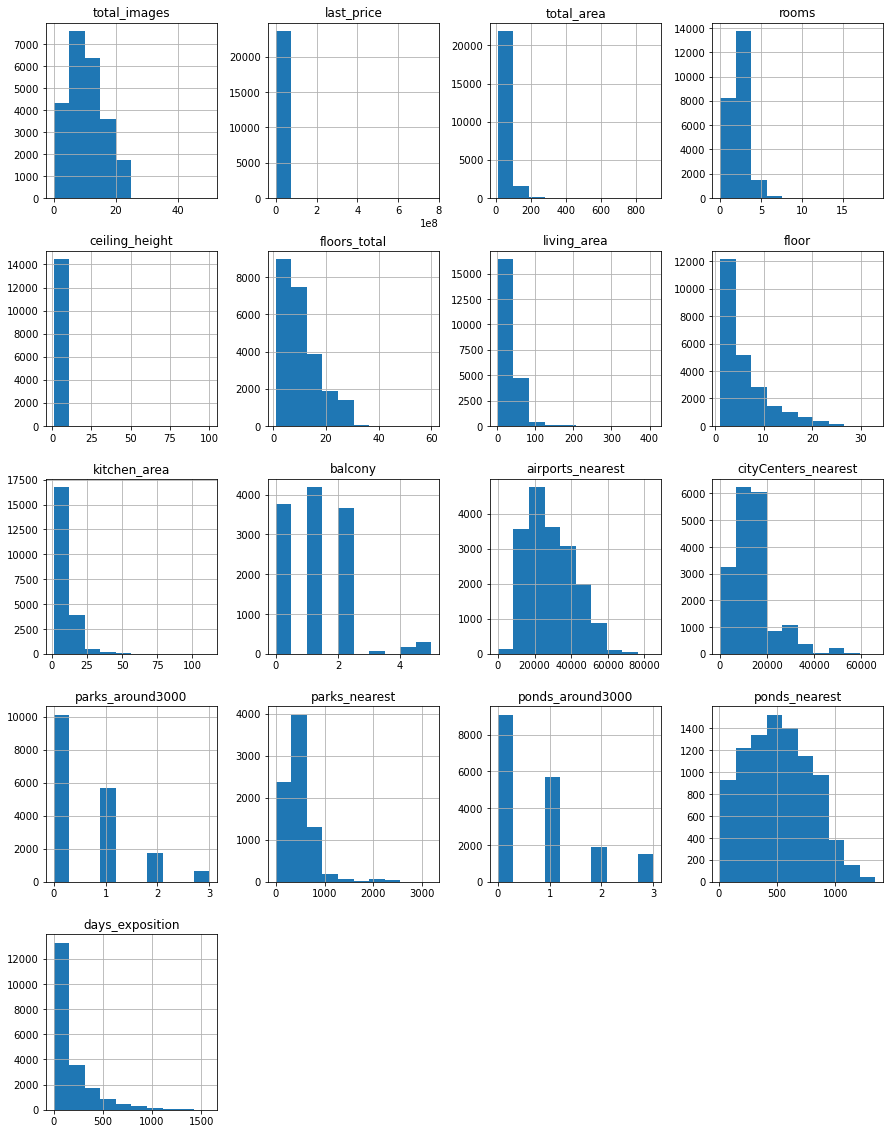

In [5]:
data.hist(figsize= (15, 20))

#### Промежуточные выводы до обработки данных:

## Шаг 2. Предобработка данных

### 2.1. Заполнение NaN

прежде чем что-то делать переименуем столбец cityCenters_nearest в snake_case

In [6]:
data = data.rename(columns= {'cityCenters_nearest' : 'city_centers_nearest'})

В рамках предыдущего этапа мы определили предполагаемые столбцы с пропусками. Теперь проверим наше предположение

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### 2.1.1 Заполнение столбцов kitchen_area, living_area

В студиях нет кухни. Для студий можем заполнить NaN нулями. За студии (комнаты) будем считать также 

In [8]:
data.loc[((data['studio'] == True) | (data['rooms'] == 0))& (data['kitchen_area'].isna()), 'kitchen_area'] = 0

In [9]:
data.kitchen_area.isna().sum()

2070

208 студий или комнат убрали

Для некоторых значений известна жилплощадь (living area). Получим площадь кухни вычитанием жилплощади из суммарной площади. Для этого напишем отдельную функцию

In [10]:
def calculate_area(data:pd.DataFrame, column1:str, column2:str, column3:str) -> pd.DataFrame:
    i = 0
    while i < data[column3].count():
        if mt.isnan(data.loc[i,column3]) == True:
            if mt.isnan(data.loc[i,column2]) != True:            
                data.loc[i,column3] = data.loc[i,column1] - data.loc[i,column2]
        i += 1
    return data    

In [11]:
data = calculate_area(data, 'total_area', 'living_area', 'kitchen_area') 
data.kitchen_area.isna().sum()

1489

Для 1489 записей значение living_area не задано. Возможна и обратная ситуация (когда есть kitchen_area но нет living_area)

In [12]:
data = calculate_area(data, 'total_area', 'kitchen_area', 'living_area') 
data.living_area.isna().sum()

1489

In [13]:
rooms_median = data.pivot_table(index= 'rooms', values= ['living_area', 'kitchen_area'] , aggfunc='median')

Остальные значения заполним медианными для количества комнат

In [14]:
def median_area(data:pd.DataFrame, rooms_median:pd.DataFrame, column1:str, column2:str, column3:str) -> pd.DataFrame:
    i = 0    
    while i < data[column1].count():
        if mt.isnan(data.loc[i,column1]) == True:            
                data.loc[i,column1] = rooms_median.loc[data.loc[i,column2] , column3]                 
        i += 1
    return data

In [15]:
data = median_area(data, rooms_median, 'kitchen_area', 'rooms', 'living_area')
data.kitchen_area.isna().sum()

0

In [16]:
data = median_area(data, rooms_median, 'living_area', 'rooms', 'kitchen_area')
data.living_area.isna().sum()

0

#### 2.1.2 Столбцы locality_name и balcony

В столбце локаций всего 49 пропусков. По сравнению с общим количеством этим можно принебречь

In [17]:
data = data.dropna(subset = 'locality_name').reset_index(drop= True)

Так же если не указано количество балконов, скорее всего их нет

In [18]:
data['balcony'] = data['balcony'].fillna(0)

In [19]:
data.balcony.isna().sum()

0

#### 2.1.3 Столбец floors

Проверим гипотезу, что если этаж не указан, значит в здании всего один этаж

In [20]:
data[data['floor'] != 1].floor.isna().sum()

0

Гипотеза не подтвердилась. В столбце количества этажей всего 86 пропусков. По сравнению с общим количеством этим можно принебречь

In [21]:
data = data.dropna(subset = 'floors_total').reset_index(drop = True)
data['floors_total'].isna().sum()

0

####  2.1.4 Cтолбец is_appartament

***Гипотеза:*** Скорее всего пропуски в столбце is_apartament означают, что объект недвижимости не является апартаментами.

Для проверки данной гипотезы логично предположить, что практически все апартаменты находятся в Санкт-Петербурге.  
Для всех населенных пунктов кроме Спб сравним количество пропущенных значений в столбце is_appartament и количество записей об объявлениях

In [22]:
not_in_spb = data.query('locality_name != "Санкт-Петербург"').is_apartment

print('Количество пропусков в столбце is_apartament вне спб, Количество записей о недвижимости вне спб:', not_in_spb.isna().sum(),',', len(not_in_spb))     

Количество пропусков в столбце is_apartament вне спб, Количество записей о недвижимости вне спб: 6987 , 7914


In [23]:
data.query('locality_name != "Санкт-Петербург"').is_apartment.count()

927

Всего 927 записей о статусе апартамены/не апартаменты в Ленинградской области !

Для того чтобы точно убедиться, среди данных записей посмотрим количество аппартаментов

In [24]:
not_in_spb = data.query('is_apartment == True' and 'is_apartment.isna() != True' and 'locality_name != "Санкт-Петербург"')
print('Количество аппартаменов в Лен.области:',not_in_spb.is_apartment.sum())

Количество аппартаменов в Лен.области: 11


Всего 11 аппартаментов по всей Ленинградской области. Из этого можно делать вывод, что если в столбце is_appartment стоит NAN, скорее всего объект недвижимости не является аппартаментами. Заполним пропуски значениями False

In [25]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data.is_apartment.isna().sum()

0

#### 2.1.5. Столбцы parks_around3000 и ponds_around3000

Если есть расстояние до парков и водоёмов, логично предположить что по близости есть хотябы один парк. Поэтому заполним все строчки где есть расстояние до парка и водоема единицами.

In [26]:
data[(data['parks_nearest'].isna() != True) & (data['parks_around3000'].isna() == True)].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [27]:
data[(data['ponds_nearest'].isna() != True) & (data['ponds_around3000'].isna() == True)].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Для всех столбцов где есть расстояние до парка и водоема, количество парков и водоемов уже заполнено.  
Можно предположить, что если парки или водоемы не указаны, их по близости нет

In [28]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

**Вывод: Гипотеза верна. С данным столбцом мы ничего не сделаем**

In [29]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

#### 2.1.7 Столбец ceiling_height

Высоту потолков расчитаем медианное значение по категориям цены и местоположения.  
Для этого категоризируем стоимость квартир.

In [30]:
data['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [31]:
for i in range(len(data)):
    if data.loc[i, 'last_price'] < 3e+06:
        data.loc[i, 'last_price_category'] = 'E'
    elif 3e+06 <= data.loc[i, 'last_price'] <= 4e+06:
        data.loc[i, 'last_price_category'] = 'D'
    elif 4e+06 <= data.loc[i, 'last_price'] <= 5e+06:
        data.loc[i, 'last_price_category'] = 'C'
    elif 5e+06 <= data.loc[i, 'last_price'] <= 6.79e+06:
        data.loc[i, 'last_price_category'] = 'B'
    elif data.loc[i, 'last_price']  > 6.79e+06:
        data.loc[i, 'last_price_category'] = 'А' 
    else:
        print(data.loc[i, 'last_price'])
        assert(False)   

По категории стоимости и локации расчитаем медиану высоту потолоков и заполним пропуски для медианными значениями

In [32]:
for i in range(len(data['ceiling_height'])): 
    if mt.isnan(data.loc[i ,'ceiling_height']) == True :
        locality_name = data.loc[i ,"locality_name"]
        last_price_category = data.loc[i ,"last_price_category"]
        data.loc[i ,'ceiling_height'] = data.query(('locality_name == @locality_name') and ('last_price_category ==@last_price_category')).ceiling_height.median()

In [33]:
data.ceiling_height.isna().sum()

0

#### 2.1.8 Столбец days_exposition

Скорее всего 3171 объявление имеет пропуски в столбце days_exposition, так как они были закрыты в первый день. Логично данные пропуски заполнить нулями

In [34]:
data['days_exposition'] = data['days_exposition'].fillna(0)

#### 2.1.9 Столбец city_centers_nearest

Заполним медианным для цены и города

In [35]:
for i in range(len(data['city_centers_nearest'])): 
    if mt.isnan(data.loc[i ,'city_centers_nearest']) == True :
        locality_name = data.loc[i ,"locality_name"]
        last_price_category = data.loc[i ,"last_price_category"]
        data.loc[i ,'city_centers_nearest'] = data.query(('locality_name == @locality_name') and ('last_price_category ==@last_price_category')).city_centers_nearest.median()

К сожалению, остальные столбцы мы не заполним

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

**Причина проблемы:** 

Пропуски данных связаны:

1. C человеческим фактором (пользователи не указывают определенные параметры)
2. C работой сайта, который воспринимает неуказанные параметры как NAN

### 2.2. Типы данных

Очевидно, что число этажей, количество балконов и количество дней с даты публикации не может быть дробным. Так же очевидно, что столбец is_apartment может принимать только 2 значения. Переведем данные столбцы в int и bool соответственно

In [37]:
data['floors_total'] = data['floors_total'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['days_exposition'] = data['days_exposition'].astype(int)
data['is_apartment'] = data['is_apartment'].astype(bool)

Значения даты публикации хранятся в строках. Лучше перевести их в DateTime

In [38]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'] , format='%Y-%m-%dT%H:%M:%S.%f')

Дробным не может быть так же кроличество парков и водоемов

In [39]:
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

Посмотрим на результат

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int32         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

**Причина проблемы:**

Некорректные типы данных связаны с ошибками в ПО (ошибки в конвертации/сборе информации на сайте)

### 2.3. Обработка дубликатов

По сути на явные и неявные дубликаты можно проверить только по столбцу локации

In [41]:
data.locality_name.unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [42]:
data.locality_name.nunique()

364

In [43]:
def delete_settlements (row :str) -> str:
    settlements  = (['посёлок', 'поселок',  'городского', 'типа', 'городской', 'деревня',
     'станции', 'Пансионат', 'садовое', 'товарищество', 'село', 'коттеджный'])
    for settlement in settlements:
        if settlement in row:
            row = row.replace(settlement, '').strip() 
    return row

In [44]:
data.locality_name = data.locality_name.apply(delete_settlements).str.lower()

In [45]:
data.locality_name.nunique()

307

57 дубликатов убрали

### 2.4. Обработка выбросов

Взглянем на данные

In [46]:
data.reset_index(drop=True)
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,18041.000000,23565.000000,23565.000000,8030.000000,23565.000000,9036.000000,23565.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.726331,10.675875,33.319006,5.878124,12.117205,0.593677,28797.082701,14914.441630,0.468831,490.580448,0.589900,518.289509,156.420115
std,5.681156,1.091093e+07,35.657060,1.078591,0.994361,6.594823,23.307157,4.871485,9.602227,0.960660,12632.499735,7783.516413,0.748403,341.572956,0.883966,278.009558,213.517293
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,18.000000,2.000000,7.100000,0.000000,18565.000000,10837.000000,0.000000,288.000000,0.000000,293.000000,22.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.600000,9.000000,29.700000,4.000000,9.700000,0.000000,26757.000000,14365.000000,0.000000,455.000000,0.000000,503.000000,73.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.800000,16.000000,42.000000,8.000000,13.000000,1.000000,37273.000000,19182.000000,1.000000,612.000000,1.000000,730.000000,198.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,571.000000,33.000000,230.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


#### 2.4.1 Столбцы ceiling_height

2.50    3515
2.60    3283
2.55    2843
2.56    2283
2.90    2119
        ... 
5.00       1
2.20       1
4.15       1
3.93       1
3.59       1
Name: ceiling_height, Length: 183, dtype: int64

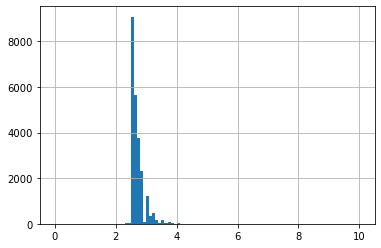

In [47]:
data['ceiling_height'].hist(bins=100, range=(0, 10))
data['ceiling_height'].value_counts()

Абсолютное большинство значений находится в диапазоне 2-4 метра, но минимальная высота потолков 1, а максимальная 100 м ? Здесь явно есть выбросы. Скорее всего здесь ошибка при вводе. Все что выше 10м будем делить на 10, предполагая что это ошибка записи десятичной дроби

In [48]:
def ceiling_height_division(cealing_hight: float) -> float:
        if cealing_hight > 10:
            cealing_hight =cealing_hight / 10
        return cealing_hight 
            
data['ceiling_height'] = data['ceiling_height'].apply(ceiling_height_division)

Отбросим все потолки меньше 2м. Их всего 5 штук

In [49]:
data = data[data['ceiling_height'] > 2]
data.ceiling_height.describe()

count    23548.000000
mean         2.700278
std          0.250423
min          2.200000
25%          2.550000
50%          2.600000
75%          2.800000
max         10.000000
Name: ceiling_height, dtype: float64

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23548 entries, 0 to 23564
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23548 non-null  int64         
 1   last_price            23548 non-null  float64       
 2   total_area            23548 non-null  float64       
 3   first_day_exposition  23548 non-null  datetime64[ns]
 4   rooms                 23548 non-null  int64         
 5   ceiling_height        23548 non-null  float64       
 6   floors_total          23548 non-null  int32         
 7   living_area           23548 non-null  float64       
 8   floor                 23548 non-null  int64         
 9   is_apartment          23548 non-null  bool          
 10  studio                23548 non-null  bool          
 11  open_plan             23548 non-null  bool          
 12  kitchen_area          23548 non-null  float64       
 13  balcony         

#### 2.4.2 Столбец floors_total

Максимальный этаж 33, а всего этажей 60 ? Здесь явно выброс

30

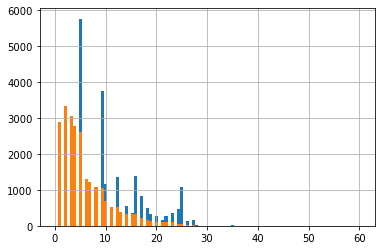

In [51]:
data['floors_total'].hist(bins=100, range=(0, 60))
data['floor'].hist(bins=100, range=(0, 60))
data[data['floors_total'] > 33].floors_total.count()

Всего 30 значений. Ими явно можно пренебречь

In [52]:
data = data[data['floors_total'] < 34]

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23518 entries, 0 to 23564
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23518 non-null  int64         
 1   last_price            23518 non-null  float64       
 2   total_area            23518 non-null  float64       
 3   first_day_exposition  23518 non-null  datetime64[ns]
 4   rooms                 23518 non-null  int64         
 5   ceiling_height        23518 non-null  float64       
 6   floors_total          23518 non-null  int32         
 7   living_area           23518 non-null  float64       
 8   floor                 23518 non-null  int64         
 9   is_apartment          23518 non-null  bool          
 10  studio                23518 non-null  bool          
 11  open_plan             23518 non-null  bool          
 12  kitchen_area          23518 non-null  float64       
 13  balcony         

#### 2.4.3 Столбцы kitchen_area и living_area

Жил площадь 0 - это явно выброс

<AxesSubplot:>

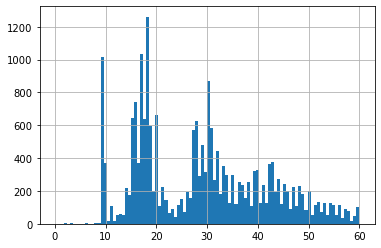

In [54]:
data['living_area'].hist(bins=100, range=(0, 60))

<AxesSubplot:>

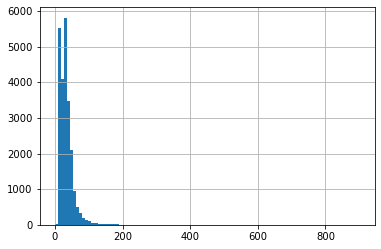

In [55]:
data['living_area'].hist(bins=100, range=(0, 900))

Уберем объявления меньше 9 квадрат и больше 400

In [56]:
data = data[(data['living_area'] > 9) & (data['living_area'] < 400)]
data.living_area.describe()

count    23010.000000
mean        33.772206
std         22.446596
min          9.100000
25%         18.000000
50%         30.000000
75%         42.000000
max        371.000000
Name: living_area, dtype: float64

Аналогично в kitchen_area

уберем значения >50 м2 и от 1 до 4 

177

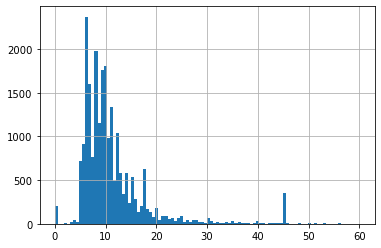

In [57]:
data['kitchen_area'].hist(bins=100, range=(0, 60))
data[data['kitchen_area'] > 50].kitchen_area.count()

<AxesSubplot:>

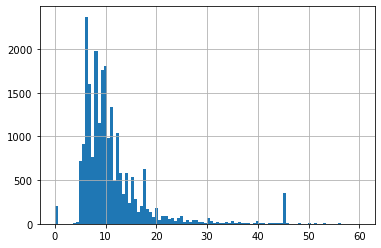

In [58]:
data = data[data['kitchen_area'] < 60]
data = data[(data['kitchen_area'] > 4) | (data['kitchen_area'] == 0)]
data['kitchen_area'].hist(bins=100, range=(0, 60))

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22792 entries, 0 to 23564
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22792 non-null  int64         
 1   last_price            22792 non-null  float64       
 2   total_area            22792 non-null  float64       
 3   first_day_exposition  22792 non-null  datetime64[ns]
 4   rooms                 22792 non-null  int64         
 5   ceiling_height        22792 non-null  float64       
 6   floors_total          22792 non-null  int32         
 7   living_area           22792 non-null  float64       
 8   floor                 22792 non-null  int64         
 9   is_apartment          22792 non-null  bool          
 10  studio                22792 non-null  bool          
 11  open_plan             22792 non-null  bool          
 12  kitchen_area          22792 non-null  float64       
 13  balcony         

#### 2.4.4 Столбец days_exposition

Конечно возможно, что объявление висело 1580, но в основном столько они не висят

<AxesSubplot:>

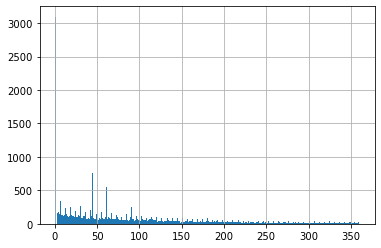

In [60]:
data['days_exposition'].hist(bins=300, range=(0, 360))

Ограничимся 2 годами

In [61]:
data[data['days_exposition'] > 1000].count()

total_images            268
last_price              268
total_area              268
first_day_exposition    268
rooms                   268
ceiling_height          268
floors_total            268
living_area             268
floor                   268
is_apartment            268
studio                  268
open_plan               268
kitchen_area            268
balcony                 268
locality_name           268
airports_nearest        225
city_centers_nearest    268
parks_around3000        268
parks_nearest           115
ponds_around3000        268
ponds_nearest           143
days_exposition         268
last_price_category     268
dtype: int64

In [62]:
data = data[data['days_exposition'] < 1000]

Так же очень врядли объекты недвижимости продавались за 1 день. Уберем значения меньше 5 дней

In [63]:
data = data[data['days_exposition'] > 7]

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18598 entries, 1 to 23561
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          18598 non-null  int64         
 1   last_price            18598 non-null  float64       
 2   total_area            18598 non-null  float64       
 3   first_day_exposition  18598 non-null  datetime64[ns]
 4   rooms                 18598 non-null  int64         
 5   ceiling_height        18598 non-null  float64       
 6   floors_total          18598 non-null  int32         
 7   living_area           18598 non-null  float64       
 8   floor                 18598 non-null  int64         
 9   is_apartment          18598 non-null  bool          
 10  studio                18598 non-null  bool          
 11  open_plan             18598 non-null  bool          
 12  kitchen_area          18598 non-null  float64       
 13  balcony         

#### 2.4.5 Столбец last_price

<AxesSubplot:>

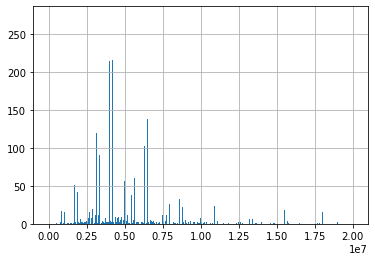

In [65]:
data['last_price'].hist(bins=3000, range=(0,0.2e+08 ))

Скорее всего цены меньше 1 млн являются выбросами

In [66]:
data = data[data['last_price']> 0.1e06]

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18597 entries, 1 to 23561
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          18597 non-null  int64         
 1   last_price            18597 non-null  float64       
 2   total_area            18597 non-null  float64       
 3   first_day_exposition  18597 non-null  datetime64[ns]
 4   rooms                 18597 non-null  int64         
 5   ceiling_height        18597 non-null  float64       
 6   floors_total          18597 non-null  int32         
 7   living_area           18597 non-null  float64       
 8   floor                 18597 non-null  int64         
 9   is_apartment          18597 non-null  bool          
 10  studio                18597 non-null  bool          
 11  open_plan             18597 non-null  bool          
 12  kitchen_area          18597 non-null  float64       
 13  balcony         

В остальных столбцах видимых выбросов нет. Значения в пределах логически обоснованых. Сбросим индексы после обработки

In [68]:
data = data.reset_index(drop = True)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18597 entries, 0 to 18596
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          18597 non-null  int64         
 1   last_price            18597 non-null  float64       
 2   total_area            18597 non-null  float64       
 3   first_day_exposition  18597 non-null  datetime64[ns]
 4   rooms                 18597 non-null  int64         
 5   ceiling_height        18597 non-null  float64       
 6   floors_total          18597 non-null  int32         
 7   living_area           18597 non-null  float64       
 8   floor                 18597 non-null  int64         
 9   is_apartment          18597 non-null  bool          
 10  studio                18597 non-null  bool          
 11  open_plan             18597 non-null  bool          
 12  kitchen_area          18597 non-null  float64       
 13  balcony         

## Шаг 3. Добавление столбцов

Добавим цену за м2

In [70]:
data['square_meter_price'] =  data['last_price'] / data['total_area']

Добавим день публикации

In [71]:
def week_day(time) -> int:
    return time.weekday()
data['week_day_exposition'] = data['first_day_exposition'].apply(week_day)

Добавим месяц публикации

In [72]:
data['month_exposition'] = data['first_day_exposition'].dt.month

Добавим год публикации

In [73]:
data['year_exposition'] = data['first_day_exposition'].dt.year

Добавим тип этажа публикации

In [74]:
i = 0
while i < data.floor.count():
    if data.loc[i,'floor'] == 1:
        data.loc[i, 'floor_type'] = 'first'
    elif data.loc[i,'floor'] == data.loc[i,'floors_total']:
        data.loc[i, 'floor_type'] = 'last'
    else:
        data.loc[i, 'floor_type'] = 'else'
    i +=1

Добавим расстояние в км до центра города

In [75]:
data['city_centers_nearest_km'] =  data['city_centers_nearest']/1000
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].apply(round)

**Результат:**

In [76]:
data.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,last_price_category,square_meter_price,week_day_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_km
6354,10,9350000.0,98.9,2016-04-13,4,2.90,4,72.7,2,False,...,3,103.0,420,А,94539.939333,2,4,2016,else,1
8733,9,4700000.0,34.7,2018-10-30,1,2.50,16,17.4,2,False,...,0,NaN,29,C,135446.685879,1,10,2018,else,15
16387,17,3088000.0,30.0,2018-03-11,1,2.70,23,9.1,23,False,...,1,390.0,8,D,102933.333333,6,3,2018,last,18
4352,16,8800000.0,78.1,2017-11-30,3,3.00,17,47.8,2,False,...,0,NaN,130,А,112676.056338,3,11,2017,else,11
11689,7,2950000.0,39.7,2016-04-29,1,2.55,3,20.8,3,False,...,1,781.0,333,E,74307.304786,4,4,2016,last,17
15697,9,3650000.0,40.0,2018-10-04,1,2.50,18,19.4,12,False,...,1,487.0,47,D,91250.000000,3,10,2018,else,22
17085,13,4000000.0,58.2,2017-11-01,3,2.60,9,37.2,2,False,...,0,NaN,113,D,68728.522337,2,11,2017,else,15
10282,12,3400000.0,29.0,2017-06-13,1,2.55,9,9.1,9,False,...,1,783.0,285,D,117241.379310,1,6,2017,last,10
2637,20,1350000.0,40.0,2018-07-10,1,2.60,4,20.0,1,False,...,0,NaN,67,E,33750.000000,1,7,2018,first,20
3106,6,4090000.0,34.9,2016-06-16,1,2.60,15,16.0,2,False,...,0,NaN,77,C,117191.977077,3,6,2016,else,11


## Шаг 4. Исследовательский анализ данных

### 4.1. Гистограммы

#### 4.1.1 Гистограмма общей площади

count    18597.000000
mean        58.330332
std         31.713033
min         13.000000
25%         39.300000
50%         50.500000
75%         67.800000
max        495.000000
Name: total_area, dtype: float64

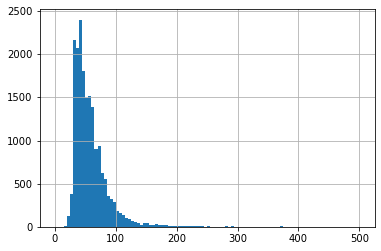

In [77]:
data['total_area'].hist(bins= 100, range= (0,500), grid= True)
data['total_area'].describe()

<AxesSubplot:>

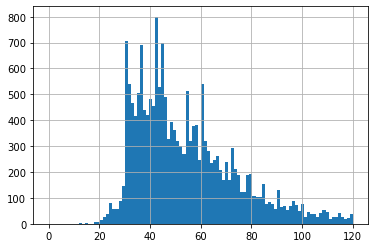

In [78]:
data['total_area'].hist(bins= 100, range= (0,120), grid= True)

**Вывод:** Площадь объектов недвижимости находится в диапазоне от 9 до ~630м2. Большинство объектов недвижимости (межквартильный интервал) имеют площадь от 40 до 71 м2. Средняя площадь - 61 м2. С оговорками можно сказать, что гистограмма имеет характер нормального распределения с отклонением в сторону квартир площадью 30-60 м2, что объясняется востребованостью таких квартир

#### 4.1.2 Гистограмма жилой площади

count    18597.000000
mean        32.782959
std         21.232817
min          9.100000
25%         18.000000
50%         29.400000
75%         41.000000
max        371.000000
Name: living_area, dtype: float64

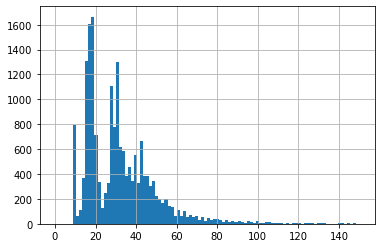

In [79]:
data['living_area'].hist(bins= 100, range= (0,150), grid= True)
data['living_area'].describe()

**Вывод:** Жилая площадь объектов недвижимости находится в диапазоне от 9 до ~140м2. Большое количество около минимального значения объясняется тем, что в комнатах и студиях нет кухни (практически вся площадь - жилая).Большинство объектов недвижимости (межквартильный интервал) имеют жилую площадь от 18 до 42,8 м2. Средняя жилая площадь - 34 м2. С оговорками можно сказать, что гистограмма имеет характер нормального распределения с отклонением в сторону квартир с жилой площадью 18-38 м2, что объясняется востребованостью таких квартир

#### 4.1.2 Гистограмма площади кухни

6.00     1072
10.00    1064
8.00      927
9.00      905
7.00      897
         ... 
5.90        1
8.57        1
8.66        1
40.30       1
17.87       1
Name: kitchen_area, Length: 973, dtype: int64

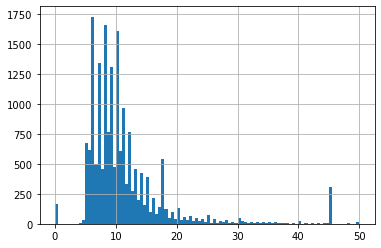

In [80]:
data['kitchen_area'].hist(bins= 100, range= (0,50), grid= True)
data['kitchen_area'].describe()
data['kitchen_area'].value_counts()

**Вывод:** Площадь кухни объектов недвижимости находится в диапазоне от 4 до ~58м2. Большое количество около нуля объясняется тем, что в комнатах и студиях нет кухни.Большинство объектов недвижимости (межквартильный интервал) имеют площадь кухни от 7 до 13 м2. Наблюдается увеличение площади кухни до 45 у квартир элитного сегмента. Средняя площадь кухни - 11,5 м2. В целом, по частоте некоторых значений можно утверждать, что самыми распространенными являются кухни площадью от 6 до 10 м2

#### 4.1.3 Гистограмма цены объекта

count    1.859700e+04
mean     6.086843e+06
std      8.380196e+06
min      4.400000e+05
25%      3.400000e+06
50%      4.500000e+06
75%      6.500000e+06
max      4.013000e+08
Name: last_price, dtype: float64


4500000.0     273
3500000.0     232
4200000.0     215
4000000.0     214
3800000.0     213
             ... 
8037000.0       1
3795000.0       1
60309900.0      1
7778000.0       1
6151120.0       1
Name: last_price, Length: 2414, dtype: int64

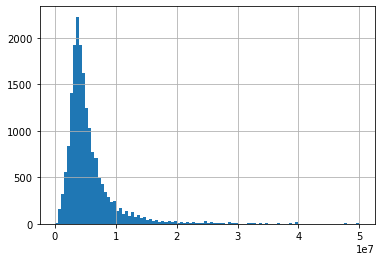

In [81]:
print(data['last_price'].describe())
data['last_price'].hist(bins= 100, range= (1e+04,0.5e+08), grid= True)
data['last_price'].value_counts()

**Вывод:** Цена объектов недвижимости находится в диапазоне от 2 vky  до . Большое количество около нуля объясняется студиями и отдельными комнатами. Большинство объектов недвижимости (межквартильный интервал) имеют количество комнат от 1 до 3 В целом распределение комнат от 1 до 3 можно считать нормальным.

#### 4.1.4 Гистограмма количества комнат

count    18597.000000
mean         2.013981
std          1.040438
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


1     6762
2     6015
3     4523
4      818
5      204
0      158
6       68
7       32
8        8
9        3
14       2
10       2
11       1
19       1
Name: rooms, dtype: int64

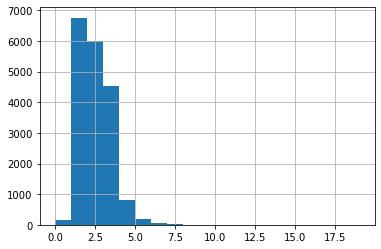

In [82]:
print(data['rooms'].describe())
data['rooms'].hist(bins= 19, range= (0,19), grid= True)
data['rooms'].value_counts()

**Вывод:** Количество комнат объектов недвижимости находится в диапазоне от 0 до 19. Значения около нуля объясняются студиями и отдельными комнатами. Большинство объектов недвижимости (межквартильный интервал) имеют количество комнат от 1 до 3 В целом распределение комнат на участке от 1 до 3 можно считать нормальным.

#### 4.1.5 Гистограмма высоты потолков

count    18597.000000
mean         2.691645
std          0.243061
min          2.200000
25%          2.550000
50%          2.600000
75%          2.750000
max         10.000000
Name: ceiling_height, dtype: float64


2.60    2715
2.50    2649
2.55    2281
2.56    1998
2.90    1637
        ... 
2.20       1
8.30       1
3.93       1
2.99       1
2.91       1
Name: ceiling_height, Length: 159, dtype: int64

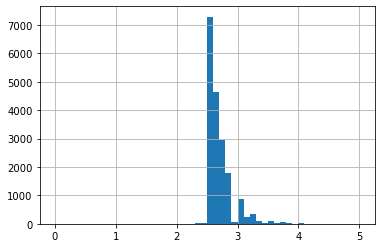

In [83]:
print(data['ceiling_height'].describe())
data['ceiling_height'].hist(bins= 50, range= (0,5), grid= True)
data['ceiling_height'].value_counts()

**Вывод:** Высота потолков объектов недвижимости находится в диапазоне от 2 до 10. Большинство объектов недвижимости (межквартильный интервал) имеют высоту потолков от 2.5 до 3.5 В целом распределение комнат на участке 2.5 до 3.5 можно считать нормальным. Большое количество потолков выотой 2,5 и 2,7м объяснятется массовым строительством жил плозади с данной высотой потолков в прошлом 

#### 4.1.6 Гистограмма этажа квартиры

count    18597.000000
mean         5.976179
std          4.916240
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         32.000000
Name: floor, dtype: float64


2     2577
3     2407
1     2238
4     2172
5     2051
6     1020
7      972
9      875
8      847
10     551
12     437
11     419
13     299
14     271
15     265
16     262
17     191
18     144
19     120
21      99
20      94
22      90
23      77
24      50
25      40
26      20
27       8
32       1
Name: floor, dtype: int64

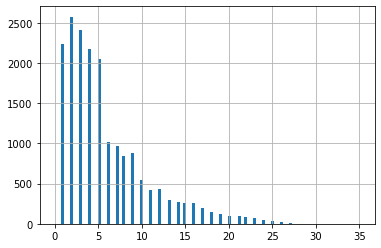

In [84]:
print(data['floor'].describe())
data['floor'].hist(bins= 100, range= (0,35), grid= True)
data['floor'].value_counts()

**Вывод:** Этаж квартиры объектов недвижимости находится в диапазоне от 1 до 32. Большинство объектов недвижимости (межквартильный интервал) находится на этаже от 3 до 8-ого. Самые частые - от 2-ого до 5-ого

#### 4.1.7 Гистограмма типа этажа квартиры

count     18597
unique        3
top        else
freq      13793
Name: floor_type, dtype: object


else     13793
last      2566
first     2238
Name: floor_type, dtype: int64

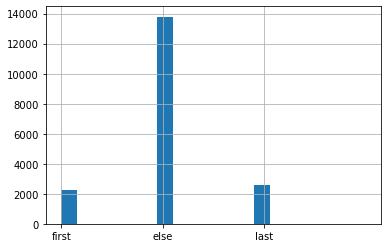

In [85]:
print(data['floor_type'].describe())
data['floor_type'].hist(bins= 19, range= (0,3), grid= True)
data['floor_type'].value_counts()

**Вывод:** Естестественно большое всего объявлений ни с первого и последнего этажа

#### 4.1.8 Гистограмма общего количества этажей в доме

count    18597.000000
mean        10.853794
std          6.591185
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         33.000000
Name: floors_total, dtype: float64


5     4459
9     3034
12    1104
16    1101
10     935
25     926
4      882
6      682
17     677
3      502
14     448
7      439
18     404
24     371
15     295
8      292
19     284
23     279
2      273
22     240
20     234
13     189
11     145
27     134
21     132
26     102
28      17
1       15
29       1
33       1
Name: floors_total, dtype: int64

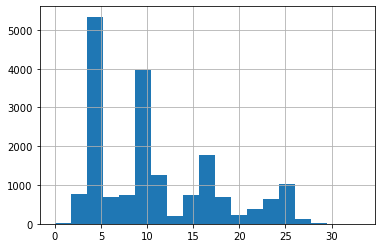

In [86]:
print(data['floors_total'].describe())
data['floors_total'].hist(bins= 19, range= (0,33), grid= True)
data['floors_total'].value_counts()

**Вывод:** Общее количество этажей объектов недвижимости находится в диапазоне от 1 до 33. Большинство объектов недвижимости (межквартильный интервал) имеет количество этажей от 5 до 16-ого. Самые частые - 5-ти, 9-ти, 6-ти и 12-ти этажки

#### 4.1.9 Гистограмма расстояния до центра города в метрах

count    18597.000000
mean     15026.969135
std       7758.189223
min        208.000000
25%      10987.000000
50%      14442.000000
75%      19107.000000
max      64857.000000
Name: city_centers_nearest, dtype: float64


19717.0    2374
15010.0    1097
14150.0     406
13188.0     302
8460.0      102
           ... 
24972.0       1
11245.0       1
5252.0        1
3270.0        1
6263.0        1
Name: city_centers_nearest, Length: 6738, dtype: int64

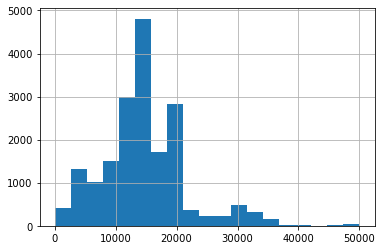

In [87]:
print(data['city_centers_nearest'].describe())
data['city_centers_nearest'].hist(bins= 19, range= (0,50000), grid= True)
data['city_centers_nearest'].value_counts()

**Вывод:** Расстояния до центра города объектов недвижимости находится в диапазоне от 181м до 50км. Большинство объектов недвижимости (межквартильный интервал) находится на расстоянии от центра города от 9,6 км до 16 км. Распределение на данном интервале можно считать нормальным.

#### 4.1.10 Гистограмма расстояния до расстояние до ближайшего аэропорта

count    14364.000000
mean     28902.159983
std      12719.117599
min          0.000000
25%      18496.000000
50%      26915.000000
75%      37412.000000
max      83758.000000
Name: airports_nearest, dtype: float64


37434.0    37
21928.0    27
37407.0    27
31744.0    22
39946.0    20
           ..
22583.0     1
23963.0     1
41150.0     1
22637.0     1
20151.0     1
Name: airports_nearest, Length: 7239, dtype: int64

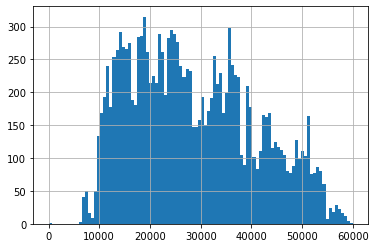

In [88]:
print(data['airports_nearest'].describe())
data['airports_nearest'].hist(bins= 100, range= (0,60000), grid= True)
data['airports_nearest'].value_counts()

**Вывод:** От аэропорта до объектов недвижимости находится в диапазоне от 9 до 68км. Большинство объектов недвижимости (межквартильный интервал) находится на расстоянии от аэропорта до объекта недвижимости от 19,6 км до 35 км. 

#### 4.1.11 Гистограмма расстояния до расстояние до ближайшего парка

count    6284.000000
mean      489.335773
std       339.870163
min         1.000000
25%       286.000000
50%       452.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64


441.0     42
456.0     39
392.0     33
173.0     30
679.0     27
          ..
710.0      1
1416.0     1
916.0      1
237.0      1
2984.0     1
Name: parks_nearest, Length: 956, dtype: int64

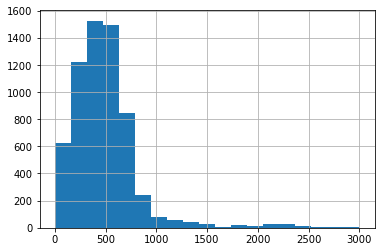

In [89]:
print(data['parks_nearest'].describe())
data['parks_nearest'].hist(bins= 19, range= (0,3000), grid= True)
data['parks_nearest'].value_counts()

**Вывод:** От ближайшего парка до объектов недвижимости находится в диапазоне от 21м до 3км. Большинство объектов недвижимости (межквартильный интервал) находится на расстоянии от парка до объекта недвижимости от 300 м до 600 м. Такие значения объясняются тем что скорее всего, если до парка больше 1,5 км - считается что парка по близости нет

#### 4.1.11 Гистограмма расстояния до расстояние до ближайшего водоема

count    7117.000000
mean      524.093157
std       275.648879
min        13.000000
25%       304.000000
50%       509.000000
75%       733.000000
max      1344.000000
Name: ponds_nearest, dtype: float64


427.0     45
454.0     40
433.0     36
153.0     33
564.0     29
          ..
994.0      1
1251.0     1
1177.0     1
1082.0     1
1134.0     1
Name: ponds_nearest, Length: 1077, dtype: int64

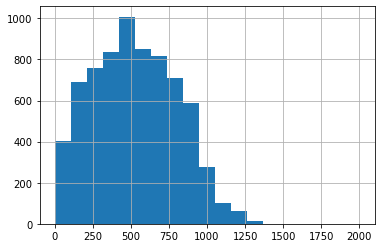

In [90]:
print(data['ponds_nearest'].describe())
data['ponds_nearest'].hist(bins= 19, range= (0,2000), grid= True)
data['ponds_nearest'].value_counts()

**Вывод:** От ближайшего водоема до объектов недвижимости находится в диапазоне от 22м до 1,4 км. Большинство объектов недвижимости (межквартильный интервал) находится на расстоянии от водоема до объекта недвижимости от 276 м до 712 м. Такие значения объясняются тем что скорее всего, если до водоема больше 1,25 км - считается что водоема по близости нет

### 4.2. Анализ

### 4.2.1 Как быстро продавались квартиры ?

median    102.00000
mean      175.78475
Name: days_exposition, dtype: float64

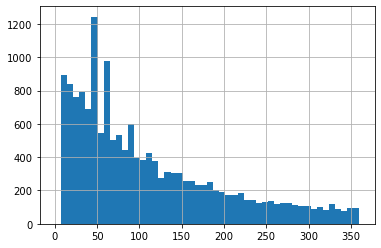

In [91]:
data.days_exposition.hist(bins= 50, range= (0,360), grid= True)
data.days_exposition.agg({'mean', 'median'})

In [92]:
data.days_exposition.describe()

count    18597.000000
mean       175.784750
std        189.025677
min          8.000000
25%         45.000000
50%        102.000000
75%        233.000000
max        999.000000
Name: days_exposition, dtype: float64

In [93]:
data[data['days_exposition'] < 45].sort_values(by= 'days_exposition')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,last_price_category,square_meter_price,week_day_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_km
2547,15,4500000.0,55.60,2018-03-24,2,2.64,12,33.50,10,False,...,0,NaN,8,C,80935.251799,5,3,2018,else,14
10507,12,2900000.0,33.30,2019-03-19,1,2.60,5,18.00,2,False,...,0,NaN,8,E,87087.087087,1,3,2019,else,20
15827,7,3850000.0,41.30,2017-04-27,1,2.80,5,14.80,5,False,...,1,177.0,8,D,93220.338983,3,4,2017,last,30
15785,10,3550000.0,30.90,2019-04-04,1,2.50,9,15.60,2,False,...,0,NaN,8,D,114886.731392,3,4,2019,else,17
3511,11,1850000.0,28.00,2017-04-14,1,2.55,25,15.00,17,False,...,0,NaN,8,E,66071.428571,4,4,2017,else,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8555,9,2900000.0,32.50,2016-06-26,1,2.55,5,18.00,1,False,...,0,NaN,44,E,89230.769231,6,6,2016,first,26
5782,18,4300000.0,41.76,2018-06-12,1,2.65,20,13.92,6,True,...,0,NaN,44,C,102969.348659,1,6,2018,else,16
7779,8,4150000.0,31.00,2018-04-04,1,2.60,5,9.10,3,False,...,1,642.0,44,C,133870.967742,2,4,2018,else,13
4878,6,2200000.0,33.00,2016-05-29,1,2.75,5,18.00,2,False,...,1,640.0,44,E,66666.666667,6,5,2016,else,36


**Вывод:** В среднем (по межквартильному размаху) квартиры продаются от 45 до 167 дней. Хотя значительное количество квартир Медианное значение - 90 дней. Минимальное - 11 дней. Быстрыми считаются продажи < 45 дней. Долгими > 167 дней

### 4.2.2 Какие факторы больше всего влияют на общую (полную) стоимость объекта? 

Построим матрицу корреляции

In [94]:
corr = data.corr().round(3)
corr.style.background_gradient(cmap='coolwarm')

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,week_day_exposition,month_exposition,year_exposition,city_centers_nearest_km
total_images,1.000000,0.110000,0.113000,0.093000,0.064000,-0.001000,0.098000,0.023000,0.012000,-0.027000,-0.026000,0.041000,0.038000,0.001000,-0.061000,0.036000,0.003000,0.006000,-0.003000,-0.018000,0.123000,-0.006000,0.025000,0.121000,-0.061000
last_price,0.110000,1.000000,0.666000,0.387000,0.379000,-0.002000,0.576000,0.025000,0.005000,-0.029000,-0.012000,0.341000,0.015000,-0.033000,-0.262000,0.217000,-0.002000,0.223000,-0.101000,0.087000,0.752000,0.003000,-0.005000,-0.051000,-0.265000
total_area,0.113000,0.666000,1.000000,0.775000,0.463000,-0.072000,0.907000,-0.030000,0.001000,-0.077000,-0.039000,0.452000,0.024000,-0.036000,-0.263000,0.197000,-0.009000,0.203000,-0.099000,0.133000,0.277000,-0.002000,0.000000,-0.092000,-0.265000
rooms,0.093000,0.387000,0.775000,1.000000,0.300000,-0.231000,0.805000,-0.161000,-0.014000,-0.148000,-0.094000,0.253000,-0.007000,-0.061000,-0.199000,0.155000,-0.049000,0.122000,-0.060000,0.118000,0.034000,-0.005000,0.002000,-0.087000,-0.201000
ceiling_height,0.064000,0.379000,0.463000,0.300000,1.000000,-0.047000,0.414000,-0.019000,0.082000,-0.001000,-0.016000,0.281000,-0.021000,-0.083000,-0.338000,0.254000,-0.021000,0.251000,-0.113000,0.103000,0.370000,-0.008000,-0.002000,-0.061000,-0.340000
floors_total,-0.001000,-0.002000,-0.072000,-0.231000,-0.047000,1.000000,-0.159000,0.677000,-0.017000,0.068000,0.051000,0.112000,0.173000,0.111000,-0.049000,-0.164000,0.105000,-0.071000,0.058000,-0.058000,0.165000,0.016000,0.009000,0.033000,-0.051000
living_area,0.098000,0.576000,0.907000,0.805000,0.414000,-0.159000,1.000000,-0.096000,-0.001000,-0.050000,-0.015000,0.180000,0.023000,-0.053000,-0.240000,0.196000,-0.046000,0.177000,-0.085000,0.131000,0.193000,-0.009000,0.001000,-0.091000,-0.241000
floor,0.023000,0.025000,-0.030000,-0.161000,-0.019000,0.677000,-0.096000,1.000000,-0.010000,0.032000,0.035000,0.085000,0.170000,0.075000,-0.035000,-0.107000,0.084000,-0.041000,0.026000,-0.043000,0.140000,0.012000,0.017000,0.023000,-0.037000
is_apartment,0.012000,0.005000,0.001000,-0.014000,0.082000,-0.017000,-0.001000,-0.010000,1.000000,-0.003000,-0.002000,0.014000,0.042000,0.017000,0.011000,0.006000,-0.023000,0.018000,0.003000,0.002000,0.029000,-0.010000,-0.008000,0.017000,0.010000
studio,-0.027000,-0.029000,-0.077000,-0.148000,-0.001000,0.068000,-0.050000,0.032000,-0.003000,1.000000,-0.004000,-0.127000,0.027000,-0.025000,0.006000,-0.033000,0.004000,-0.013000,0.014000,-0.018000,0.020000,0.001000,0.002000,0.014000,0.007000


###### Корреляции к last_price:

        - общей площади : 0.639000
        - жилой площади : 0.569000
        - площади кухни : 0.381000
        - количество комнат : 0.386000         
        - даты размещения (день недели) : 0.005000
        - даты размещения (месяц): -0.016000
        - даты размещения (год): -0.025000

Теперь посмотрим зависимость между средней ценой и типом этажа 

In [95]:
list1 = ['else',data[data['floor_type'] == 'else'].last_price.median()/1e06]
list2 = ['first',data[data['floor_type'] == 'first'].last_price.median()/1e06]        
list3 = ['last',data[data['floor_type'] == 'last'].last_price.median()/1e06]      
floor_type_price = pd.DataFrame([list1, list2, list3], columns= ['floor_type', 'median_price'])
floor_type_price.head()

,floor_type,median_price
0,else,4.700000
1,first,3.810514
2,last,4.250000


In [96]:
data[data['floor_type'] == 'else'].last_price.count()

13793

In [97]:
data[data['floor_type'] == 'first'].last_price.count()

2238

In [98]:
data[data['floor_type'] == 'last'].last_price.count()

2566

<AxesSubplot:xlabel='floor_type', ylabel='median_price'>

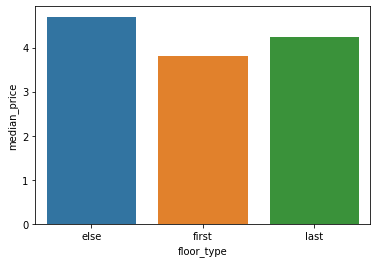

In [99]:
import seaborn as sns
sns.barplot(data= floor_type_price, x='floor_type', y='median_price')

**Вывод:**

На цену объекта недвижимости влияют:  общая площадь (соответствено и жилая площадь, площадь кухни, количество комнат и цена м2). Дата практически не влияет на цену. Не смотря на то, что медианная цена на квартиры не на последнем и первом этаже больше, количество квартир на первом и последнем этажах мало, что не позволяет делать однозначный вывод

### 4.2.3 Расчитаем среднюю стоимость м2 

In [100]:
data.groupby('locality_name').square_meter_price.median().sort_values(ascending = False).head(10)

locality_name
лисий нос          113728.348730
санкт-петербург    102957.135106
зеленогорск        100000.000000
сестрорецк          98364.164501
пушкин              97988.680008
кудрово             95026.041667
парголово           90873.186845
мистолово           89247.449733
стрельна            87323.348694
репино              86542.207792
Name: square_meter_price, dtype: float64

Вывод: Самые большая цена за м2 в Спб и курортных пригородах, далее идут ближайшие не курортные пригороды и населенные пункты

### 4.2.3 Расчитаем стоимость "километра" в Спб

Расчитает расстояние в километрах от центра до самого дальнего объекта недвижимости 

In [101]:
city_centers_nearest_spb = data[data['locality_name'] == 'санкт-петербург']
max_km = city_centers_nearest_spb.city_centers_nearest_km.max()
max_km

29

Расчитаем разницу в стоимости между объявлением в центре и самым отдаленным от центра объектом

In [102]:
zero_km_price = city_centers_nearest_spb[city_centers_nearest_spb['city_centers_nearest_km'] == 0].last_price.median()
max_km_price = city_centers_nearest_spb[city_centers_nearest_spb['city_centers_nearest_km'] == 29].last_price.median()
difference_km_price = zero_km_price - max_km

In [103]:
(difference_km_price/max_km)/1e06

0.3877576206896552

C приближением к центру города стоимость квартиры увеличивается в среднем на ~388 тыс.руб за 1 км

## Шаг 5. Общий вывод

#### 5.1. Цель работы: 

По данным от Яндекс недвижимости выполнить предобработку данных и изучить их,   
чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости, а именно:
    
1. Изучить, как быстро продавались квартиры
2. Определить какие факторы больше всего влияют на общую (полную) стоимость объекта?
3. Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра. 
4. Найти закономерность между стоимостью объектов зависит от расстояния до центра города.

#### 5.2. Анализ и предобработка представленного датасета с данными о заемщиках банка с данными о недвижимости по Спб и Ленинградской области

В рамках предобработки данных были обнаружены следующие ошибки в датасете:
    
    1. Наименование столбца cityCenters_nearest несоответствует snake_case
    2. В столбцах  ceiling_height, living_area, is_apartment, kitchen_area, balcony, airports_nearest,  
    cityCenters_nearest, parks_around3000, parks_neares, ponds_around3000, ponds_nearest, first_day_exposition 
    имеют пропуски (значения NaN). Данные пропуски связаны как с человеческим фактором так и с ошибками в стороннем ПО 
    и сборе данных
    3. Наличие выбросов в датасете. Например явные ошибки при записи десятичных дробей в высоте пололков (25 вместо 2.5)
    4. Наличие неявных дубликатов в столбце locality_name. Например поселок городского типа Рябово и посёлок Рябово  
    5. Неверный тип переменных в столбцах. Например object в столбце is_apartament или float в столбце days_exposition 

В ходе предобработки данного датасета **были выполнены следующие действия:**  

1. Пропуски в столбцах где это возможно были заполнены медианным значением из соответствующих группc помощью логической индексации и метода  (например столбцы kitchen_area и living_area медианными значениями по группам по количеству комнат) .median()
2. Где это было логически обосновано, пропуски были заполнены нулями (например в столбце is_apartament и balcony)
3. Изменены типы столбцов is_apartament и balcony, first_day_exposition, floors_total, parks_around3000, ponds_around300
3. Обработаны неявные дубликаты в столбце locality_name: значения в столбце приведены к одному регистру с помощью метода .str.lower(), убраны наименования населенных пунктов.

Для дальнейшего анализа были добавлены столбцы:

 1. цена одного квадратного метра
 2. день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
 3. месяц публикации объявления
 4. год публикации объявления
 5. тип этажа квартиры (значения — «первый», «последний», «другой»)
 6. расстояние в км до центра города

После преобработки данных по каждому столбцу были построены гистограммы для визуализации результатов

В ходе дальнейшего анализа для определения факторов, влияющих на цену объекта недвижимости, была построена таблица корреляции ниже

In [104]:
corr.abs().style.background_gradient(cmap='coolwarm')

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,week_day_exposition,month_exposition,year_exposition,city_centers_nearest_km
total_images,1.000000,0.110000,0.113000,0.093000,0.064000,0.001000,0.098000,0.023000,0.012000,0.027000,0.026000,0.041000,0.038000,0.001000,0.061000,0.036000,0.003000,0.006000,0.003000,0.018000,0.123000,0.006000,0.025000,0.121000,0.061000
last_price,0.110000,1.000000,0.666000,0.387000,0.379000,0.002000,0.576000,0.025000,0.005000,0.029000,0.012000,0.341000,0.015000,0.033000,0.262000,0.217000,0.002000,0.223000,0.101000,0.087000,0.752000,0.003000,0.005000,0.051000,0.265000
total_area,0.113000,0.666000,1.000000,0.775000,0.463000,0.072000,0.907000,0.030000,0.001000,0.077000,0.039000,0.452000,0.024000,0.036000,0.263000,0.197000,0.009000,0.203000,0.099000,0.133000,0.277000,0.002000,0.000000,0.092000,0.265000
rooms,0.093000,0.387000,0.775000,1.000000,0.300000,0.231000,0.805000,0.161000,0.014000,0.148000,0.094000,0.253000,0.007000,0.061000,0.199000,0.155000,0.049000,0.122000,0.060000,0.118000,0.034000,0.005000,0.002000,0.087000,0.201000
ceiling_height,0.064000,0.379000,0.463000,0.300000,1.000000,0.047000,0.414000,0.019000,0.082000,0.001000,0.016000,0.281000,0.021000,0.083000,0.338000,0.254000,0.021000,0.251000,0.113000,0.103000,0.370000,0.008000,0.002000,0.061000,0.340000
floors_total,0.001000,0.002000,0.072000,0.231000,0.047000,1.000000,0.159000,0.677000,0.017000,0.068000,0.051000,0.112000,0.173000,0.111000,0.049000,0.164000,0.105000,0.071000,0.058000,0.058000,0.165000,0.016000,0.009000,0.033000,0.051000
living_area,0.098000,0.576000,0.907000,0.805000,0.414000,0.159000,1.000000,0.096000,0.001000,0.050000,0.015000,0.180000,0.023000,0.053000,0.240000,0.196000,0.046000,0.177000,0.085000,0.131000,0.193000,0.009000,0.001000,0.091000,0.241000
floor,0.023000,0.025000,0.030000,0.161000,0.019000,0.677000,0.096000,1.000000,0.010000,0.032000,0.035000,0.085000,0.170000,0.075000,0.035000,0.107000,0.084000,0.041000,0.026000,0.043000,0.140000,0.012000,0.017000,0.023000,0.037000
is_apartment,0.012000,0.005000,0.001000,0.014000,0.082000,0.017000,0.001000,0.010000,1.000000,0.003000,0.002000,0.014000,0.042000,0.017000,0.011000,0.006000,0.023000,0.018000,0.003000,0.002000,0.029000,0.010000,0.008000,0.017000,0.010000
studio,0.027000,0.029000,0.077000,0.148000,0.001000,0.068000,0.050000,0.032000,0.003000,1.000000,0.004000,0.127000,0.027000,0.025000,0.006000,0.033000,0.004000,0.013000,0.014000,0.018000,0.020000,0.001000,0.002000,0.014000,0.007000


Так же расчитаны средние цены квадратного метра по локациям объекта недвижимости 

и расчитана цена "километра" при приближении к центру Спб от окраинше всего влияют на общую (полную) стоимость объекта?

#### 5.3. Общий вывод

**Вывод по динамике продаж:**  
  
В среднем объекты недвижимости продаются от 45 до 167 дней. Медианное значение - 90 дней. Минимальное - 11 дней. Быстрыми считаются продажи меньше 45 дней. Долгими - больше 167 дней

**Вывод по факторам, влияющим на стоимость объекта недвижимости:**

1. Наибольшее влияние на цену объекта оказывают суммарная площадь (соответственно жилая площадь и площадь кухни) 
2. Столбцы со значениями количества комнат, высоты потолков, расстояния до центра, количества парков и водоемов имеют слабую корреляцию с ценой (0,3...0.4)
3. Остальные столбцы c ценой практически не коррелируют (значения около нуля)

**Вывод по цене квадратного метра:**

Самые большие цены за м2 в Спб и курортных пригородах, далее идут ближайшие не курортные пригороды и населенные пункты. Сводка с ценами за м2 дана в таблице ниже

In [105]:
data.groupby('locality_name').square_meter_price.median().sort_values(ascending = False).head(10)

locality_name
лисий нос          113728.348730
санкт-петербург    102957.135106
зеленогорск        100000.000000
сестрорецк          98364.164501
пушкин              97988.680008
кудрово             95026.041667
парголово           90873.186845
мистолово           89247.449733
стрельна            87323.348694
репино              86542.207792
Name: square_meter_price, dtype: float64

**Вывод по наличию закономерности между стоимости объектов и расстояния до центра города**:

C приближением к центру города стоимость квартиры увеличивается в среднем на ~388 тыс.руб за 1 км

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод